In [1]:
from glob import glob

import numpy as np
import pandas as pd
from scipy import stats
import sklearn

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('templated/super_glue:boolq:GPT-3_Style.csv')
df.columns = ['index', 'input', 'output', 'fixed_choices', 'label']
df

,index,input,output,fixed_choices,label
0,0,"Persian language -- Persian (/ˈpɜːrʒən, -ʃən/)...",Yes,"[""No"", ""Yes""]",1
1,1,Good Samaritan law -- Good Samaritan laws offe...,Yes,"[""No"", ""Yes""]",1
2,2,Windows Movie Maker -- Windows Movie Maker (fo...,Yes,"[""No"", ""Yes""]",1
3,3,"Powdered sugar -- Powdered sugar, also called ...",Yes,"[""No"", ""Yes""]",1
4,4,The Elder Scrolls Online -- As with other game...,No,"[""No"", ""Yes""]",0
...,...,...,...,...,...
9422,9422,United States district court -- The United Sta...,Yes,"[""No"", ""Yes""]",1
9423,9423,Landlord harassment -- If a landlord is found ...,Yes,"[""No"", ""Yes""]",1
9424,9424,Golden State Warriors -- The Warriors went int...,Yes,"[""No"", ""Yes""]",1
9425,9425,List of Downton Abbey episodes -- Downton Abbe...,No,"[""No"", ""Yes""]",0


In [3]:
for fn in glob('outputs/*.jsonl'):
    print(fn)
    name = fn.split(':')[-1][:-6]
    print(name)
    
    outs = pd.read_json(fn, lines=True)
    print(len(outs))
    
    if len(outs) == 0:
        continue
        
    no = outs.iloc[:,0]
    yes = outs.iloc[:,1]
    
    df['%s:prob' % name] = yes / (yes + no)
    df['%s:pred' % name] = [ 1 if x else 0 for x in yes > no ]

outputs/super_glue:boolq:I_wonder….jsonl
I_wonder…
9427
outputs/super_glue:boolq:yes_no_question.jsonl
yes_no_question
9427
outputs/super_glue:boolq:exercise.jsonl
exercise
9427
outputs/super_glue:boolq:based_on_the_previous_passage.jsonl
based_on_the_previous_passage
9427
outputs/super_glue:boolq:valid_binary.jsonl
valid_binary
9427
outputs/super_glue:boolq:could_you_tell_me….jsonl
could_you_tell_me…
9427
outputs/super_glue:boolq:GPT-3_Style.jsonl
GPT-3_Style
9427
outputs/super_glue:boolq:exam.jsonl
exam
9427
outputs/super_glue:boolq:based_on_the_following_passage.jsonl
based_on_the_following_passage
9427
outputs/super_glue:boolq:after_reading.jsonl
after_reading
9427


In [4]:
df

,index,input,output,fixed_choices,label,I_wonder…:prob,I_wonder…:pred,yes_no_question:prob,yes_no_question:pred,exercise:prob,...,could_you_tell_me…:prob,could_you_tell_me…:pred,GPT-3_Style:prob,GPT-3_Style:pred,exam:prob,exam:pred,based_on_the_following_passage:prob,based_on_the_following_passage:pred,after_reading:prob,after_reading:pred
0,0,"Persian language -- Persian (/ˈpɜːrʒən, -ʃən/)...",Yes,"[""No"", ""Yes""]",1,0.027694,0,0.915194,1,1.0,...,0.029340,0,0.829262,1,0.841143,1,0.027699,0,1.000000,1
1,1,Good Samaritan law -- Good Samaritan laws offe...,Yes,"[""No"", ""Yes""]",1,0.029815,0,0.916801,1,1.0,...,0.030435,0,0.745855,1,0.883198,1,0.024290,0,1.000000,1
2,2,Windows Movie Maker -- Windows Movie Maker (fo...,Yes,"[""No"", ""Yes""]",1,0.032366,0,0.957760,1,1.0,...,0.033740,0,0.482561,0,0.673535,1,0.033904,0,1.000000,1
3,3,"Powdered sugar -- Powdered sugar, also called ...",Yes,"[""No"", ""Yes""]",1,0.030843,0,0.842633,1,1.0,...,0.032262,0,0.637032,1,0.528618,1,0.029286,0,0.268704,0
4,4,The Elder Scrolls Online -- As with other game...,No,"[""No"", ""Yes""]",0,0.035725,0,0.850051,1,1.0,...,0.037157,0,0.584919,1,0.624039,1,0.034812,0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,9422,United States district court -- The United Sta...,Yes,"[""No"", ""Yes""]",1,0.036071,0,0.943871,1,1.0,...,0.036519,0,0.890260,1,0.923583,1,0.030188,0,1.000000,1
9423,9423,Landlord harassment -- If a landlord is found ...,Yes,"[""No"", ""Yes""]",1,0.026187,0,0.931447,1,1.0,...,0.026978,0,0.751736,1,0.809254,1,0.023852,0,1.000000,1
9424,9424,Golden State Warriors -- The Warriors went int...,Yes,"[""No"", ""Yes""]",1,0.028945,0,0.920085,1,1.0,...,0.030520,0,0.578341,1,0.389568,0,0.028511,0,0.243127,0
9425,9425,List of Downton Abbey episodes -- Downton Abbe...,No,"[""No"", ""Yes""]",0,0.033506,0,0.406560,0,1.0,...,0.034361,0,0.068534,0,0.086539,0,0.032648,0,0.109734,0


In [5]:
for col in df.columns:
    if not ':pred' in col:
        continue
        
    acc = np.mean(df[col] == df['label'])
    roc = stats.kendalltau(df['%s:prob' % col[:-5]], df['label']).correlation
    print(col, acc, roc)

I_wonder…:pred 0.37689614935822635 0.0044893919948666055
yes_no_question:pred 0.6478200912273258 0.5265964924334872
exercise:pred 0.6683992786676567 0.0003103784520405616
based_on_the_previous_passage:pred 0.37689614935822635 0.03342535684548642
valid_binary:pred 0.6232099289275486 0.005515043325339838
could_you_tell_me…:pred 0.37689614935822635 0.010245741864017832
GPT-3_Style:pred 0.8031187016017821 0.5185240857721691
exam:pred 0.7971783175983876 0.5008438167115845
based_on_the_following_passage:pred 0.37689614935822635 0.021059151789593052
after_reading:pred 0.7131643152646653 0.313152334949885


In [6]:
# make a split
idx = np.arange(len(df))
np.random.shuffle(idx)

train_ex = 500
train_idx = idx[:train_ex]
test_idx = idx[train_ex:]

train = pd.DataFrame(df.iloc[train_idx])
test = pd.DataFrame(df.iloc[test_idx])

In [7]:
cols = [ i for i in df.columns if i.endswith(':prob') ]

In [8]:
# calibrate
for c in df.columns:
    print(c)
    if not c.endswith(':prob'):
        continue
        
    lr = LogisticRegression()
    lr.fit(train[c].to_numpy().reshape(-1, 1), train['label'])

    cal_prob = lr.predict_proba(df[c].to_numpy().reshape(-1, 1))
    df['%s_cal' % c] = cal_prob[:,1]
    
    cal_prob = lr.predict_proba(train[c].to_numpy().reshape(-1, 1))
    train['%s_cal' % c] = cal_prob[:,1]
    
    cal_prob = lr.predict_proba(test[c].to_numpy().reshape(-1, 1))
    test['%s_cal' % c] = cal_prob[:,1]

index
input
output
fixed_choices
label
I_wonder…:prob
I_wonder…:pred
yes_no_question:prob
yes_no_question:pred
exercise:prob
exercise:pred
based_on_the_previous_passage:prob
based_on_the_previous_passage:pred
valid_binary:prob
valid_binary:pred
could_you_tell_me…:prob
could_you_tell_me…:pred
GPT-3_Style:prob
GPT-3_Style:pred
exam:prob
exam:pred
based_on_the_following_passage:prob
based_on_the_following_passage:pred
after_reading:prob
after_reading:pred


In [9]:
# calibrated pred
for col in df.columns:
    if not col.endswith(':prob_cal'):
        continue
     
    c = '%s:pred_cal' % col.split(':')[0]
    df[c] = (df[col] > 0.5).astype(int)
    
    train[c] = (train[col] > 0.5).astype(int) 
    test[c] = (test[col] > 0.5).astype(int) 
        
    acc = np.mean(df[c] == df['label'])
    roc = stats.kendalltau(df[c], df['label']).correlation
    print(col, acc, roc)

I_wonder…:prob_cal 0.6231038506417736 nan
yes_no_question:prob_cal 0.7727803118701602 0.5171103218593224
exercise:prob_cal 0.6683992786676567 0.24743460381436716
based_on_the_previous_passage:prob_cal 0.6231038506417736 nan
valid_binary:prob_cal 0.6231038506417736 nan
could_you_tell_me…:prob_cal 0.6231038506417736 nan
GPT-3_Style:prob_cal 0.807573989604328 0.5822130614816886
exam:prob_cal 0.7966479261695131 0.5571377350781925
based_on_the_following_passage:prob_cal 0.6231038506417736 nan
after_reading:prob_cal 0.7131643152646653 0.36832651801092475


In [10]:
lr = LogisticRegression()
cols = [ i for i in df.columns if i.endswith(':prob')]
lr.fit(train[cols], train['label'])
print(cols)
print(lr.coef_)

preds = lr.predict(test[cols])
print('acc', np.mean(preds == test['label']))

['I_wonder…:prob', 'yes_no_question:prob', 'exercise:prob', 'based_on_the_previous_passage:prob', 'valid_binary:prob', 'could_you_tell_me…:prob', 'GPT-3_Style:prob', 'exam:prob', 'based_on_the_following_passage:prob', 'after_reading:prob']
[[-0.07022756  2.2417846   0.6831722  -0.05160224  0.05960574 -0.06206248
   2.76176391  2.27248435 -0.05935114  0.62772579]]
acc 0.8180799820768455


In [11]:
lr = LogisticRegression()
cal_cols = [ '%s_cal' % c for c in cols ]
lr.fit(train[cal_cols], train['label'])
print(cal_cols)
print(lr.coef_)

preds = lr.predict(test[cal_cols])
print('acc', np.mean(preds == test['label']))

['I_wonder…:prob_cal', 'yes_no_question:prob_cal', 'exercise:prob_cal', 'based_on_the_previous_passage:prob_cal', 'valid_binary:prob_cal', 'could_you_tell_me…:prob_cal', 'GPT-3_Style:prob_cal', 'exam:prob_cal', 'based_on_the_following_passage:prob_cal', 'after_reading:prob_cal']
[[2.76308643e-03 3.03425960e+00 6.22397437e-01 1.07874291e-03
  6.98648245e-03 2.21258464e-03 2.08350754e+00 2.10700219e+00
  1.59434749e-03 7.06629401e-01]]
acc 0.8194242186624846


In [12]:
def logistic_reg_queries(weights, intercept, features):
    w_ = weights[0]
    w_idx = np.argsort(-np.abs(w_))
    
    q = 0
    for i in range(0, len(w_idx)):
        q += 1
        
        # sum computed
        running = 0
        for j in range(0, i+1):
            running += w_[w_idx[j]] * features[w_idx[j]]
            
        # largest possible weights
        remaining_pos = 0
        remaining_neg = 0
        for j in range(i+1, len(w_idx)):
            if w_[w_idx[j]] > 0:
                remaining_pos += w_[w_idx[j]]
            else:
                remaining_neg += w_[w_idx[j]]
        
        if np.sign(running + remaining_pos + intercept) == np.sign(running + remaining_neg + intercept):
            break
        
    return q

lengths = []
for i in range(0, len(test)):
    l = logistic_reg_queries(lr.coef_, lr.intercept_, test[cal_cols].iloc[i])
    lengths.append(l)
print(np.mean(l))

4.0


In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train[cal_cols], train['label'])

preds = nb.predict(test[cal_cols])
print('acc', np.mean(preds == test['label']))

acc 0.7641984989358127


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train[cal_cols], train['label'])

preds = dt.predict(test[cal_cols])
print('acc', np.mean(preds == test['label']))

acc 0.8031813599193458


In [15]:
fts = dt.tree_.feature

In [16]:
plt.figure(figsize=(20,20))
#sklearn.tree.plot_tree(dt)
preds = dt.decision_path(test[cal_cols])

lengths = []
for i in range(1120, len(test)):
    _, idx = preds[i].nonzero()
    unique = set(fts[idx])
    lengths.append(len(unique)-1)

print(np.mean(lengths))

2.808505187652107


<Figure size 1440x1440 with 0 Axes>

/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

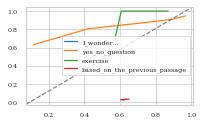

In [52]:
from sklearn.calibration import calibration_curve
import seaborn as sns
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

plt.figure(figsize=(3, 1.8))

for i, c in enumerate(df.columns[:12]):
    if not c.endswith(':prob'):
        continue
    x, y = calibration_curve(df['label'], df[c], strategy='quantile')
    ax = sns.lineplot(x, y, markers='o', label=c.split(':')[0])
ax.plot([0,1],[0,1], linestyle='--', color='grey', transform=ax.transAxes)

/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/johnny/.conda/envs/prompts/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

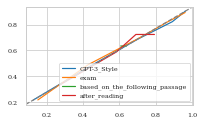

In [66]:
plt.figure(figsize=(3, 1.8))
for i, c in enumerate(df.columns[31:]):
    if not c.endswith(':prob_cal'):
        continue
    x, y = calibration_curve(df['label'], df[c], strategy='quantile')
    ax = sns.lineplot(x, y, markers='o', label=c.split(':')[0])
ax.plot([0,1],[0,1], linestyle='--', color='grey', transform=ax.transAxes)
plt.savefig('calibrated_prompts.pdf')